## Importation Libs

In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
import joblib

## Load Data

In [333]:
def My_Data(Path_file):
    Data = pd.read_csv(Path_file)
    return Data

DF = My_Data("data-68fe0fb66c2ee565848417.csv")
DF

,age,gender,status,pressurehight,pressurelow,glucose,kcm,troponin,impluse
0,64,1,negative,160,83,160.0,1.80,0.012,66
1,21,1,positive,98,46,296.0,6.75,1.060,94
2,55,1,negative,160,77,270.0,1.99,0.003,64
3,64,1,positive,120,55,270.0,13.87,0.122,70
4,55,1,negative,112,65,300.0,1.08,0.003,64
...,...,...,...,...,...,...,...,...,...
1314,44,1,negative,122,67,204.0,1.63,0.006,94
1315,66,1,positive,125,55,149.0,1.33,0.172,84
1316,45,1,positive,168,104,96.0,1.24,4.250,85
1317,54,1,positive,117,68,443.0,5.80,0.359,58


## Info Data 

In [334]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   status         1319 non-null   object 
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   impluse        1319 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


## Describe Data

In [335]:
DF.describe()

,age,gender,pressurehight,pressurelow,glucose,kcm,troponin,impluse
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,127.170584,72.269143,146.634344,15.274306,0.360942,78.336619
std,13.647315,0.474027,26.122720,14.033924,74.923045,46.327083,1.154568,51.630270
min,14.000000,0.000000,42.000000,38.000000,35.000000,0.321000,0.001000,20.000000
25%,47.000000,0.000000,110.000000,62.000000,98.000000,1.655000,0.006000,64.000000
50%,58.000000,1.000000,124.000000,72.000000,116.000000,2.850000,0.014000,74.000000
75%,65.000000,1.000000,143.000000,81.000000,169.500000,5.805000,0.085500,85.000000
max,103.000000,1.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1111.000000


## Check Duplicate

In [336]:
def Duplicat_Checker(Data):
    Duplicat = Data.duplicated().sum()
    if Duplicat > 0:
        print(f"Have Duplicated : {Duplicat}")
        Data = Data.drop_duplicates()
    else:
        print("No Duplicated")
    return Data

Duplicat_Checker(DF)

No Duplicated


,age,gender,status,pressurehight,pressurelow,glucose,kcm,troponin,impluse
0,64,1,negative,160,83,160.0,1.80,0.012,66
1,21,1,positive,98,46,296.0,6.75,1.060,94
2,55,1,negative,160,77,270.0,1.99,0.003,64
3,64,1,positive,120,55,270.0,13.87,0.122,70
4,55,1,negative,112,65,300.0,1.08,0.003,64
...,...,...,...,...,...,...,...,...,...
1314,44,1,negative,122,67,204.0,1.63,0.006,94
1315,66,1,positive,125,55,149.0,1.33,0.172,84
1316,45,1,positive,168,104,96.0,1.24,4.250,85
1317,54,1,positive,117,68,443.0,5.80,0.359,58


## Chacker Missing Null

In [337]:
def Missing_Value_Checker(Data):
    Missing_Value = Data.isnull().sum().sum()
    if Missing_Value > 0:
        print(f"Have Missing Value : {Missing_Value}")
    else:
        print("No Missing Value")
    return Data

Missing_Value_Checker(DF)

No Missing Value


,age,gender,status,pressurehight,pressurelow,glucose,kcm,troponin,impluse
0,64,1,negative,160,83,160.0,1.80,0.012,66
1,21,1,positive,98,46,296.0,6.75,1.060,94
2,55,1,negative,160,77,270.0,1.99,0.003,64
3,64,1,positive,120,55,270.0,13.87,0.122,70
4,55,1,negative,112,65,300.0,1.08,0.003,64
...,...,...,...,...,...,...,...,...,...
1314,44,1,negative,122,67,204.0,1.63,0.006,94
1315,66,1,positive,125,55,149.0,1.33,0.172,84
1316,45,1,positive,168,104,96.0,1.24,4.250,85
1317,54,1,positive,117,68,443.0,5.80,0.359,58


## Creation CountPlot (Gender)

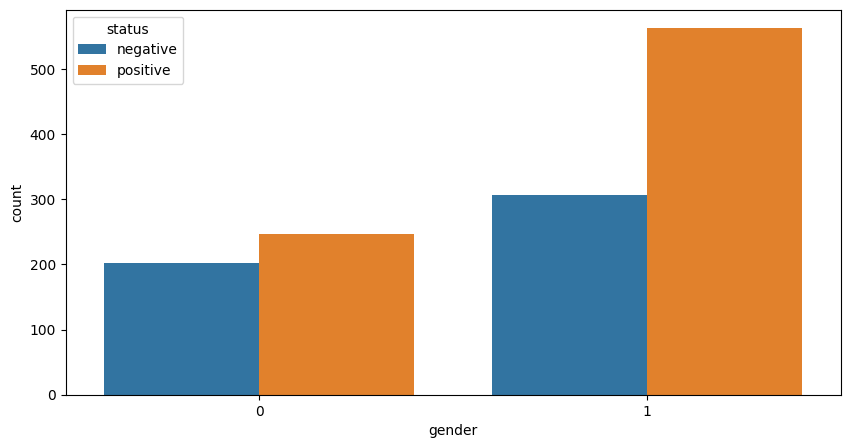

In [338]:
plt.figure(figsize=(10, 5))
sns.countplot(data=DF, x='gender', hue='status')
plt.show()

## Creation Heatmap (Corr)

<Axes: >

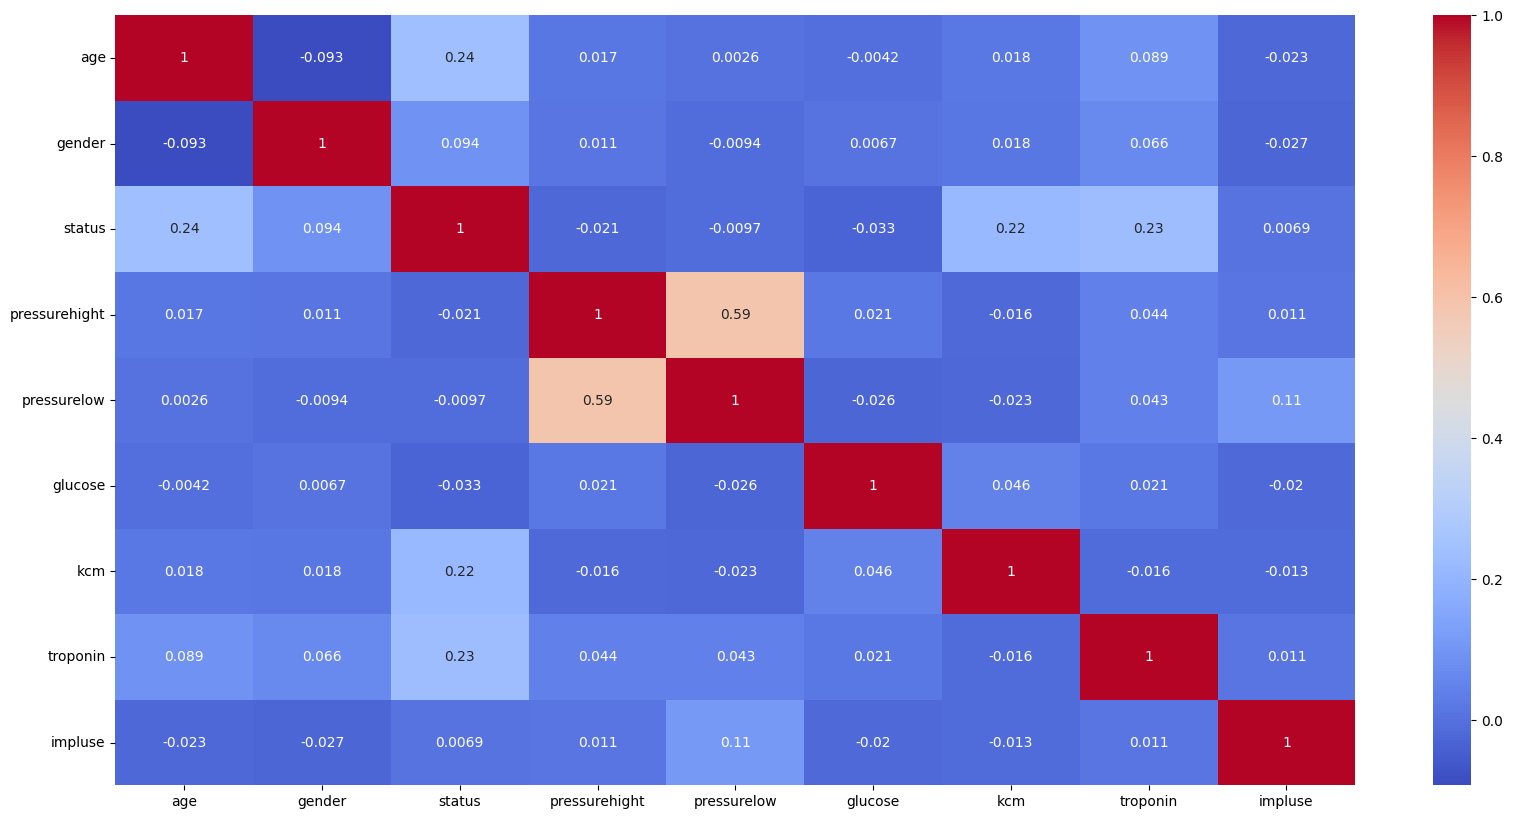

In [339]:
Copy_Data = DF.copy()
Copy_Data['status'] = Copy_Data['status'].map({'positive': 1, 'negative': 0})
plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(Copy_Data.corr()), annot=True, cmap='coolwarm')

## Split Data

In [340]:
X = Copy_Data.drop(columns=['status'],axis=1)
y = Copy_Data['status']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Confirmation Featurs

In [341]:

X_old = Copy_Data.drop(columns=['status'],axis=1)
selector = SelectKBest(score_func=f_classif, k=4)
selector.fit_transform(X_old, y)

selected_features = pd.DataFrame(
    selector.get_support(),
    index=X_old.columns,
    columns=["Selected"]
)

print(selected_features)

               Selected
age                True
gender             True
pressurehight     False
pressurelow       False
glucose           False
kcm                True
troponin           True
impluse           False


## Training Model 

In [342]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score :{f1}")
print(f"accuracy :{accuracy}")

F1 Score :0.9847094801223242
accuracy :0.9810606060606061


## Creation Pipline

In [343]:
pipeline = Pipeline(steps=[
    ('fs',SelectKBest(score_func=f_classif,k=4)),
    ('Classif',RandomForestClassifier())
])


pipeline.fit(x_train, y_train)
y_pred_pip = pipeline.predict(x_test)
accuracy_pip = accuracy_score(y_test, y_pred)
f1_pip = f1_score(y_test, y_pred)

print(f"Pipeline Acc : {accuracy_pip}")
print(f"Pipeline F1 : {f1_pip}")


Pipeline Acc : 0.9810606060606061
Pipeline F1 : 0.9847094801223242


### Saving Model (joblib):

In [346]:
filname = "joblib.dump"
joblib.dump(pipeline, filname)
loaded_model = joblib.load(filname)

patient_data = {
    'age': 60,
    'gender': 1,
    'pressurehight': 98,
    'pressurelow': 46,
    'glucose': 296,
    'kcm': 1.75,
    'troponin': 0.06,
    'impluse': 94
}

X_one = pd.DataFrame([patient_data])

Prediction = loaded_model.predict(X_one)
print("Predictions from loaded model:", Prediction)

if Prediction[0] == 1:
    print("The model predicts a positive status.")
else:
    print("The model predicts a negative status.")


Predictions from loaded model: [1]
The model predicts a positive status.


In [ ]:
# @app.post('/patients/Pred_risk/{patient_id}')
# def get_prediction(patient_id: int, db: Session = Depends(get_db)):
#     patient = db.query(patient_model).filter(patient_model.id == patient_id).first()

#     if not patient:
#         return {"message": "No Patient Found"}
    
#     model = joblib.load('Model/joblib.dump')

#     print(reshaped_data)
    
#     Prediction = model.predict(reshaped_data)

#     return Prediction